In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
# Inputs and MV function
μ = np.array([0.005, 0.04, 0.075, 0.085, 0.095])                          # mean vector
Σ = np.array([[0.005, 0,   0, 0, 0],
              [0,    0.07, 0, 0, 0],
              [0,    0,    0.16, 0, 0],
              [0,    0,    0, 0.17, 0],
              [0,    0,    0, 0, 0.2]])                      # std_dev matrix
corr = np.array([[1, 0.05, -0.05, -0.05, 0.05],
                [0.05, 1, 0.5, 0.5, 0.5],
                [-0.05, 0.5, 1, 0.8, 0.7],
                [-0.05, 0.5, 0.8, 1, 0.9],
                [0.05, 0.5, 0.7, 0.9, 1]])
N = len(μ)                                                # number of assets
one = np.zeros(N) + 1                                     # vector of ones

# MV function
covariance_matrix = Σ.T @ corr @ Σ
# bnds = ((-1,None),)*N                                      # bounds
fun = lambda w: 0.5 * w.T @ covariance_matrix @ w                         # goal function

In [3]:
# 1. Equal-weighted portfolio
weights = [0.2, 0.2, 0.2, 0.2, 0.2]
portfolio_mean = (np.array(weights) @ μ).round(2)

# mean_equal_weighted = sum([0.005, 0.04, 0.075, 0.085, 0.095]) / 5
print("The mean of equal weighted portfolio is {:.2f}%".format(portfolio_mean * 100))
print("The standard deviation of the equal weighted portfolio is {:.2f}%".format(100 * (2 * fun(np.array([0.2, 0.2, 0.2, 0.2, 0.2]))) ** 0.5))

The mean of equal weighted portfolio is 6.00%
The standard deviation of the equal weighted portfolio is 10.70%


In [4]:
# 2. GMV constraint
cons = ({'type': 'eq', 'fun': lambda w: w.T @ one - 1},
        {'type': 'eq', 'fun': lambda w: w.T @ μ - portfolio_mean})

# Run GMV optimization for unbounded portfolio
res = minimize(fun, [1/N]*N, method='SLSQP', constraints=cons)
print("Portfolio weights (US cash, US bonds, US stocks, DM stocks & EM stocks) =", res.x.round(2))
std_dev = ((2* fun(np.array(list(res.x)))) ** 0.5) * 100
print("Standard deviation of the above portfolio is {:.2f}%".format(std_dev))
print("US bonds dominate this portfolio with a weight of 82%. So the portfolio is not very well diversified.")

Portfolio weights (US cash, US bonds, US stocks, DM stocks & EM stocks) = [-0.16  0.82  0.15  0.13  0.06]
Standard deviation of the above portfolio is 9.78%
US bonds dominate this portfolio with a weight of 82%. So the portfolio is not very well diversified.


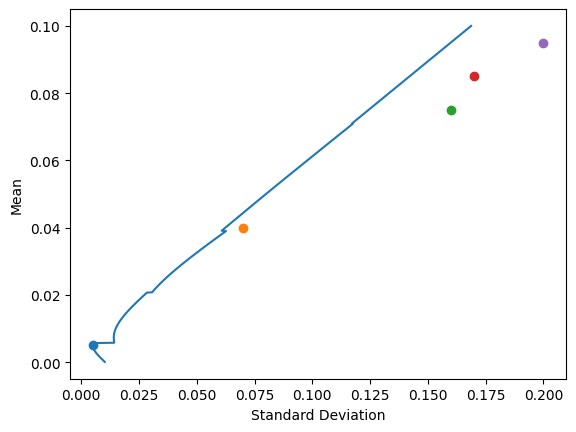

In [5]:
# 3. Minimum Variance Frontier
means, vars = [], []
target_mean = 0
while target_mean <= 0.1:
    target_mean += 0.0001   # starting with a target_mean of 0, we are incrementing with small changehs of 0.01 % in the target mean to get the desired portfolio weights and
    means.append(target_mean)
    cons = ({'type': 'eq', 'fun': lambda w: w.T @ one - 1},
            {'type': 'eq', 'fun': lambda w: w.T @ μ - target_mean})
    # Run GMV optimization for unbounded portfolio
    res = minimize(fun, [1/N]*N, method='SLSQP', constraints=cons)
    vars.append((2 * fun(np.array(list(res.x)))) ** 0.5)
plt.plot(vars, means)
for idx, i in enumerate(μ):
    plt.scatter(Σ[idx][idx], μ[idx])
plt.ylabel('Mean')
plt.xlabel('Standard Deviation')
plt.show()

In [6]:
new_target_means = [0.02, 0.03, 0.04, 0.05, 0.06, 0.07]
weights = []
means = []
stddevs = []
for target_mean in new_target_means:
    means.append(target_mean)
    cons = ({'type': 'eq', 'fun': lambda w: w.T @ one - 1},
            {'type': 'eq', 'fun': lambda w: w.T @ μ - target_mean})
    # Run GMV optimization for unbounded portfolio
    res = minimize(fun, [1/N]*N, method='SLSQP', constraints=cons)
    weights.append(res.x.round(2))
    stdev = ((2 * fun(np.array(list(res.x)))) ** 0.5).round(3)
    stddevs.append(stdev)
    print("Target portfolio mean: {:.2f}%, Portfolio Std Dev: {:.2f}%, Weights: {}".format(target_mean*100, stdev*100, res.x.round(2)))

Target portfolio mean: 2.00%, Portfolio Std Dev: 2.70%, Weights: [0.65 0.3  0.   0.04 0.01]
Target portfolio mean: 3.00%, Portfolio Std Dev: 4.50%, Weights: [0.5  0.31 0.12 0.06 0.01]
Target portfolio mean: 4.00%, Portfolio Std Dev: 6.20%, Weights: [0.28 0.5  0.03 0.1  0.08]
Target portfolio mean: 5.00%, Portfolio Std Dev: 8.00%, Weights: [0.05 0.69 0.08 0.12 0.06]
Target portfolio mean: 6.00%, Portfolio Std Dev: 9.80%, Weights: [-0.16  0.82  0.15  0.13  0.06]
Target portfolio mean: 7.00%, Portfolio Std Dev: 11.60%, Weights: [-0.36  0.94  0.21  0.15  0.05]


In [7]:
## 4. to find the global minimum, we will remove the target mean constraint and then minimize
cons = ({'type': 'eq', 'fun': lambda w: w.T @ one - 1})

# Run GMV optimization for unbounded portfolio
res = minimize(fun, [1/N]*N, method='SLSQP', constraints=cons)
print("The global minimum variance portfolio has weights: (US cash, US bonds, US stocks, DM stocks & EM stocks) =", res.x.round(2))
std_dev = ((2* fun(np.array(list(res.x)))) ** 0.5) * 100
portfolio_mean = (np.array(res.x.round(2)) @ μ).round(2)
print("The mean returns of the global minimum variance portfolio is {:.2f}% and the standard deviation is {:.2f}%".format(portfolio_mean*100, std_dev))

The global minimum variance portfolio has weights: (US cash, US bonds, US stocks, DM stocks & EM stocks) = [ 0.99  0.   -0.01  0.04 -0.03]
The mean returns of the global minimum variance portfolio is 0.00% and the standard deviation is 0.52%


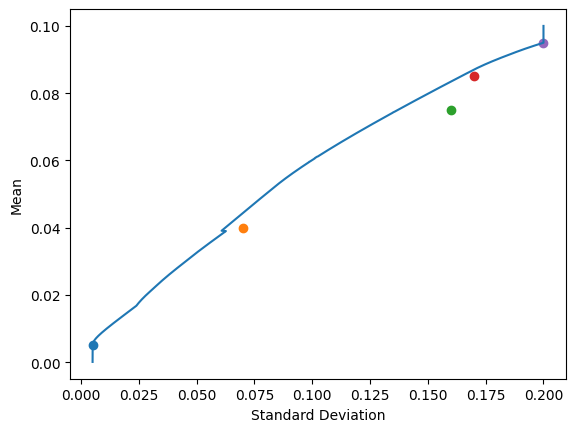

In [8]:
## 5. with short sale constraints
means, vars = [], []
target_mean = 0
while target_mean <= 0.1:
    target_mean += 0.0001   # starting with a target_mean of 0, we are incrementing with small changehs of 0.01 % in the target mean to get the desired portfolio weights
    means.append(target_mean)
    cons = ({'type': 'eq', 'fun': lambda w: w.T @ one - 1},
            {'type': 'eq', 'fun': lambda w: w.T @ μ - target_mean})
    # Run GMV optimization for bounded portfolio
    bnds = ((0,1),)*N
    res = minimize(fun, [1/N]*N, method='SLSQP', constraints=cons, bounds=bnds)
    vars.append((2 * fun(np.array(list(res.x)))) ** 0.5)
plt.plot(vars, means)
for idx, i in enumerate(μ):
    plt.scatter(Σ[idx][idx], μ[idx])
plt.ylabel('Mean')
plt.xlabel('Standard Deviation')
plt.show()

In [9]:
new_target_means = [0.02, 0.03, 0.04, 0.05, 0.06, 0.07]
weights = []
means = []
stddevs = []
for target_mean in new_target_means:
    means.append(target_mean)
    cons = ({'type': 'eq', 'fun': lambda w: w.T @ one - 1},
            {'type': 'eq', 'fun': lambda w: w.T @ μ - target_mean})
    bnds = [(0,1)]*N
    res = minimize(fun, [1/N]*N, method='SLSQP', constraints=cons, bounds=bnds)
    weights.append(res.x.round(2))
    stdev = ((2 * fun(np.array(list(res.x)))) ** 0.5).round(3)
    stddevs.append(stdev)
    print("Target portfolio mean: {:.2f}%, Portfolio Std Dev: {:.2f}%, Weights: {}".format(target_mean*100, stdev*100, res.x.round(2)))

Target portfolio mean: 2.00%, Portfolio Std Dev: 2.80%, Weights: [0.62 0.34 0.05 0.   0.  ]
Target portfolio mean: 3.00%, Portfolio Std Dev: 4.50%, Weights: [0.5  0.31 0.12 0.06 0.01]
Target portfolio mean: 4.00%, Portfolio Std Dev: 6.20%, Weights: [0.28 0.5  0.03 0.1  0.08]
Target portfolio mean: 5.00%, Portfolio Std Dev: 8.00%, Weights: [0.05 0.69 0.08 0.12 0.06]
Target portfolio mean: 6.00%, Portfolio Std Dev: 10.00%, Weights: [0.   0.54 0.17 0.16 0.12]
Target portfolio mean: 7.00%, Portfolio Std Dev: 12.40%, Weights: [0.   0.33 0.22 0.23 0.22]


The standard deviations are a little bigger and the weights whose unconstrained portfolios required short selling are very different.

In [10]:
μ_new = np.array([0.005, 0.04, 0.08, 0.08, 0.095])
target_mean = 0.06
means.append(target_mean)
cons = ({'type': 'eq', 'fun': lambda w: w.T @ one - 1},
        {'type': 'eq', 'fun': lambda w: w.T @ μ_new - target_mean})
# Run GMV optimization for unbounded portfolio
res = minimize(fun, [1/N]*N, method='SLSQP', constraints=cons)
vars.append((2 * fun(np.array(list(res.x)))) ** 0.5)
print("New portfolio weights (US cash, US bonds, US stocks, DM stocks & EM stocks) =", res.x.round(2))

New portfolio weights (US cash, US bonds, US stocks, DM stocks & EM stocks) = [-0.11  0.78  0.27 -0.14  0.2 ]


In [11]:
print("Weights earlier (US cash, US bonds, US stocks, DM stocks & EM stocks) = [-0.16  0.82  0.15  0.13  0.06]")
print("Weights now (US cash, US bonds, US stocks, DM stocks & EM stocks) = [-0.11  0.78  0.27 -0.14  0.2 ]")
print("As we can see, the weight for DM stocks has reduced from 0.13 to -0.14 which is a significant change. All other changes are mostly minor changes.")

Weights earlier (US cash, US bonds, US stocks, DM stocks & EM stocks) = [-0.16  0.82  0.15  0.13  0.06]
Weights now (US cash, US bonds, US stocks, DM stocks & EM stocks) = [-0.11  0.78  0.27 -0.14  0.2 ]
As we can see, the weight for DM stocks has reduced from 0.13 to -0.14 which is a significant change. All other changes are mostly minor changes.
